# Data exploration

## Import dataset

In [11]:
import pandas as pd
import os

df = pd.DataFrame()
directory_path = "data/"
for file_name in os.listdir(directory_path):
    try:
        file_path = os.path.join(directory_path, file_name)
        # Read the CSV file into a temporary DataFrame
        temp_df = pd.read_excel(file_path)
        
        # Append the contents to the main DataFrame
        df = pd.concat([df, temp_df], ignore_index=True)
    except:
        print(f"Cannot append {file_name} in the dataframe")

df.head()

Cannot append cleaned_data.csv in the dataframe


,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,NaN,estelle-51227,j'ai quitté mon ancien contrat d'assurance che...,Néoliane Santé,sante,test,12/01/2017,01/01/2017,I left my former insurance contract at General...,NaN,NaN
1,NaN,leadum-51107,j'ai souscrit à cette mutuelle l'année dernier...,Néoliane Santé,sante,test,09/01/2017,01/01/2017,I subscribed to this mutual a year last year a...,NaN,NaN
2,NaN,enora-49520,"Impossible d'avoir le bon service , ils raccro...",Néoliane Santé,sante,test,24/11/2016,01/11/2016,"Impossible to have the right service, they han...",NaN,NaN
3,NaN,bea-139295,Génération est une mutuelle très chère pour un...,Génération,sante,test,09/11/2021,01/11/2021,Generation is a very expensive mutual for a re...,NaN,NaN
4,NaN,anna-139192,je viens d apprendre que je suis radié... j ap...,Génération,sante,test,08/11/2021,01/11/2021,I just learned that I am struck off ... I call...,NaN,NaN


In [12]:
# Drop useless columns 
df.drop(["auteur","avis_cor_en","avis_cor"], axis=1, inplace= True)

# Aesthetic
df['produit']= df['produit'].str.capitalize()

In [13]:
# Convert a column to datetime
df['date_publication'] = pd.to_datetime(df['date_publication'], dayfirst=True)
df['date_exp'] = pd.to_datetime(df['date_exp'], dayfirst=True)
df['produit'] = df['produit'].astype('category')
df['assureur'] = df['assureur'].astype('category')
df['type'] = df['type'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34435 entries, 0 to 34434
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   note              24104 non-null  float64       
 1   avis              34435 non-null  object        
 2   assureur          34435 non-null  category      
 3   produit           34435 non-null  category      
 4   type              34435 non-null  category      
 5   date_publication  34435 non-null  datetime64[ns]
 6   date_exp          34435 non-null  datetime64[ns]
 7   avis_en           34433 non-null  object        
dtypes: category(3), datetime64[ns](2), float64(1), object(2)
memory usage: 1.4+ MB


In [15]:
df

,note,avis,assureur,produit,type,date_publication,date_exp,avis_en
0,NaN,j'ai quitté mon ancien contrat d'assurance che...,Néoliane Santé,Sante,test,2017-01-12,2017-01-01,I left my former insurance contract at General...
1,NaN,j'ai souscrit à cette mutuelle l'année dernier...,Néoliane Santé,Sante,test,2017-01-09,2017-01-01,I subscribed to this mutual a year last year a...
2,NaN,"Impossible d'avoir le bon service , ils raccro...",Néoliane Santé,Sante,test,2016-11-24,2016-11-01,"Impossible to have the right service, they han..."
3,NaN,Génération est une mutuelle très chère pour un...,Génération,Sante,test,2021-11-09,2021-11-01,Generation is a very expensive mutual for a re...
4,NaN,je viens d apprendre que je suis radié... j ap...,Génération,Sante,test,2021-11-08,2021-11-01,I just learned that I am struck off ... I call...
...,...,...,...,...,...,...,...,...
34430,3.0,POUR LE MOMENT JE SUIS SATISFAIT DE CETTE MUTU...,Santiane,Sante,train,2018-04-12,2018-04-01,For the moment I am satisfied with this mutual
34431,5.0,Le service et l'accompagnement sont de très bo...,Zen'Up,Credit,train,2021-04-22,2021-04-01,The service and support are of very good quali...
34432,1.0,La pire assurance dans laquelle j'ai été.\nDou...,Active Assurances,Auto,train,2021-10-09,2021-10-01,The worst insurance in which I was.\nDoubly of...
34433,3.0,Je suis satisfe. Le prix ça me convien. Pas ch...,L'olivier Assurance,Auto,train,2021-03-26,2021-03-01,I am satisfied. The price suits me. Cheap. The...


## Data visualization

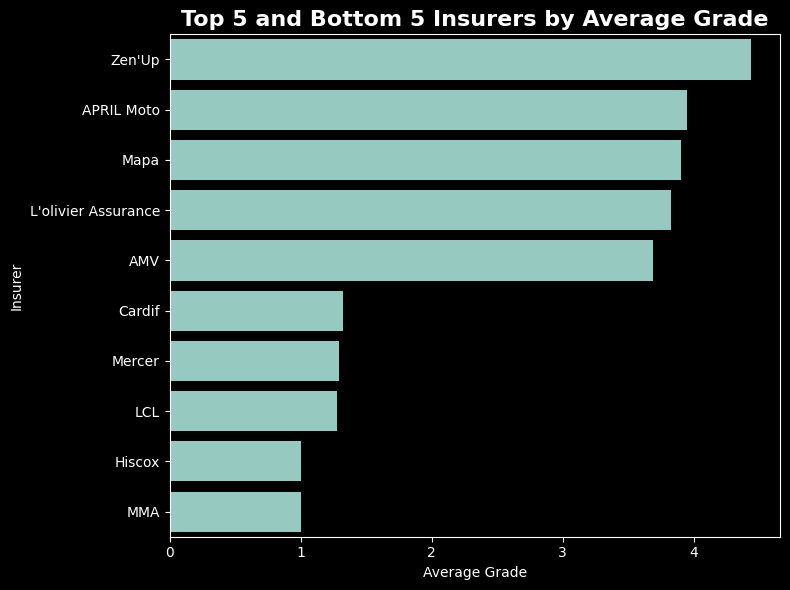

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'assureur' and calculate the mean of 'note'
average_grade_by_insurer = df.groupby('assureur', observed=True)['note'].mean().reset_index()

# Sort the data by the average grade for better visualization
average_grade_by_insurer = average_grade_by_insurer.sort_values(by='note', ascending=False)

# Select the top 5 and bottom 5 insurers
top_5 = average_grade_by_insurer.head(5)
bottom_5 = average_grade_by_insurer.tail(5)

# Combine the top 5 and bottom 5 insurers
selected_insurers = pd.concat([top_5, bottom_5])

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='note', y='assureur', data=selected_insurers, order=selected_insurers['assureur'])
plt.title('Top 5 and Bottom 5 Insurers by Average Grade',fontsize=16, fontweight='bold')
plt.xlabel('Average Grade')
plt.ylabel('Insurer')
plt.tight_layout()
plt.savefig("media/insurerstandings.png")
plt.show()

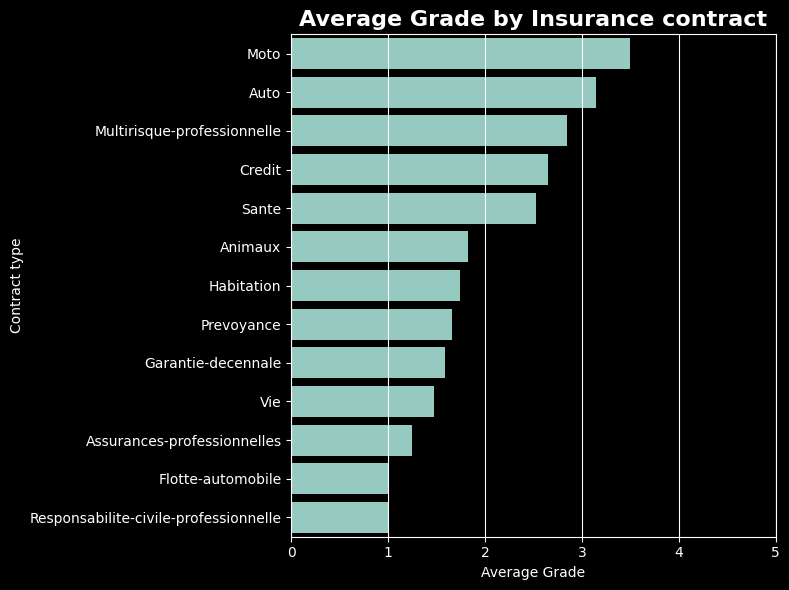

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'assureur' and calculate the mean of 'note'
average_grade_by_insurer = df.groupby('produit', observed=True)['note'].mean().reset_index()

# Sort the data by the average grade for better visualization
average_grade_by_insurer = average_grade_by_insurer.sort_values(by='note', ascending=False)

# Plotting using seaborn
plt.figure(figsize=(8,6))
sns.barplot(x='note', y='produit', data=average_grade_by_insurer, order=average_grade_by_insurer['produit'])
plt.title('Average Grade by Insurance contract',fontsize=16, fontweight='bold')
plt.xlabel('Average Grade')
plt.xlim((0,5))
plt.grid(axis = "x")
plt.ylabel('Contract type')
plt.tight_layout()
plt.savefig("media/averagegrade.png")
plt.show()

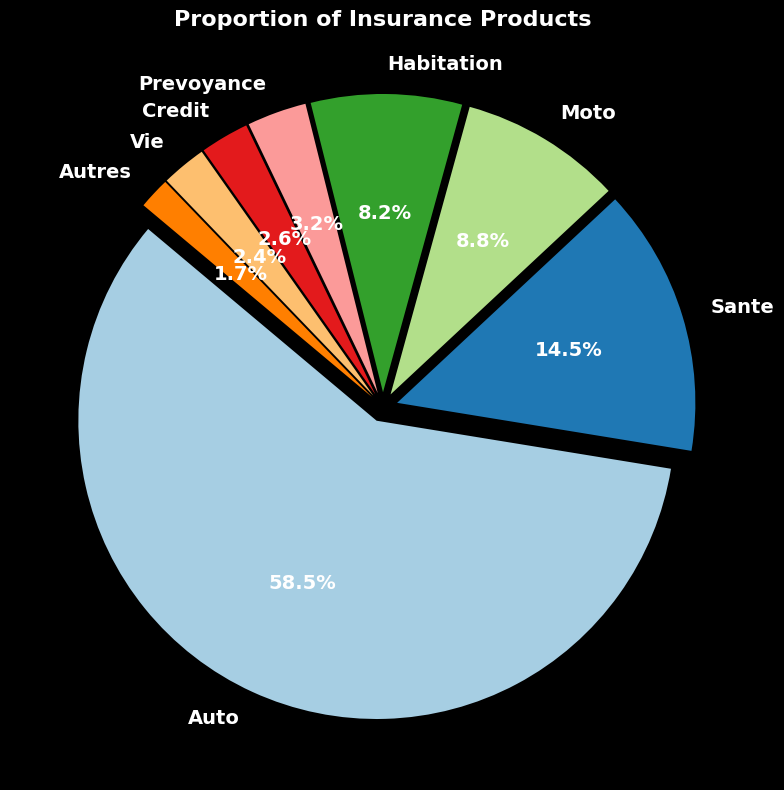

In [18]:
# Calculate the count and proportion of each product
product_counts = df['produit'].value_counts()
product_proportions = product_counts / product_counts.sum() * 100

# Categorize products with less than 2% as 'Autre'
product_proportions['Autres'] = product_proportions[product_proportions < 2].sum()

# Filter out products that have less than 2% and create a new Series
filtered_product_proportions = product_proportions[product_proportions >= 2]

# Combine the 'autres' category
final_product_proportions = pd.concat([filtered_product_proportions, pd.Series({'Autres': product_proportions['Autres']})])

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(final_product_proportions, labels=final_product_proportions.index,
        textprops={'weight': 'bold', 'size': 14},
          autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors,explode=[0.05 for _ in range(len(final_product_proportions))])
plt.title('Proportion of Insurance Products',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("media/pie.png")
plt.show()

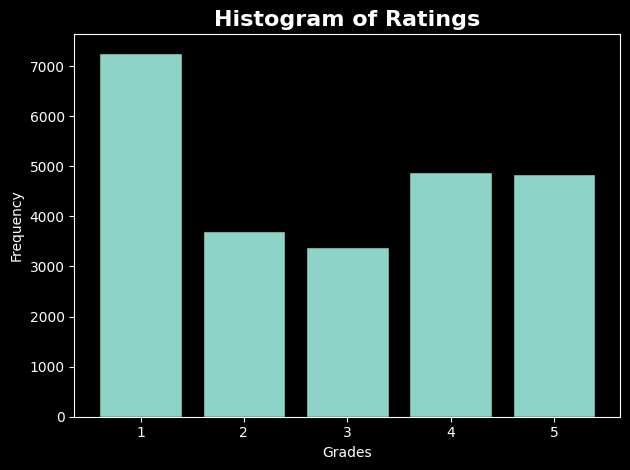

In [19]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df['note'], bins=range(1, 7), edgecolor='black', align='left', rwidth=0.8)
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings',fontsize=16, fontweight='bold')
plt.xticks(range(1, 6))  # Ensure labels match discrete categories
plt.tight_layout()
plt.savefig("media/histogram.png")
plt.show()

## Initial conclusions

s

## Export the cleaned dataset

In [20]:
df.to_csv("data/cleaned_data.csv")